# Sagemaker RL Lab - Summit 2019

Hi! and welcome to the sage maker Reinforcement Learning lab for summit 2019. 

Reinforcement Learning has been directly responsible for some of the biggest breakthoughs in the field of modern machine learning. 

Some of the events you may have heard about in the media include [AlphaGo](https://deepmind.com/research/alphago/), [OpenAI Five](https://openai.com/blog/openai-five/) &[ Deepmind's AlphaStar](https://deepmind.com/blog/alphastar-mastering-real-time-strategy-game-starcraft-ii/) - all powered by Reinforcement Learning.

Outside of games however, we are beginning to see more use cases of Reinforcement Learning in the wild. 

Including [web stores product recommendations](https://arxiv.org/pdf/1805.02343.pdf),  [  news recommendation](https://towardsdatascience.com/deep-reinforcement-learning-for-news-recommendation-part-1-architecture-5741b1a6ed56), [in the finance industry](https://www.forbes.com/sites/quora/2018/07/25/what-are-the-latest-works-on-reinforcement-learning-in-the-financial-field/#3c35b15b44df) , [Automated Architecture search for Machine Learning using RL](https://ai.googleblog.com/2017/05/using-machine-learning-to-explore.html) ,[End to End  Machine Learning for Self Driving Cars](https://wayve.ai/), and last and most excitingly the field of Robotics where [Deep Reinforcement Learning is exploding!](https://www.therobotreport.com/reinforcement-learning-industrial-robotics/)

But it all started somewhere, and today's current enthusiam around RL started only 4 years ago, with the release of [Deepmind DQN algorithm in the scientific journal nature in 2015.](https://www.nature.com/articles/nature14236)

For those who may not be aware, in the DQN paper, Deepmind took several classic atari 2600 games and learnt to play them at human level with just raw pixels values from the screen. 

When learning to play games, you & I as humans learnt to play this exact same way by just observing the raw images that are being produced by the screen!

But what really set DQN apart from previous work, was that in some instances, the DQN algorithm ***went beyond human level!***

Some of you may have seen this before, but in what has now become a famous example of Ai research work, let us watch DQN learning to play the Atari game of breakout at a super human level!

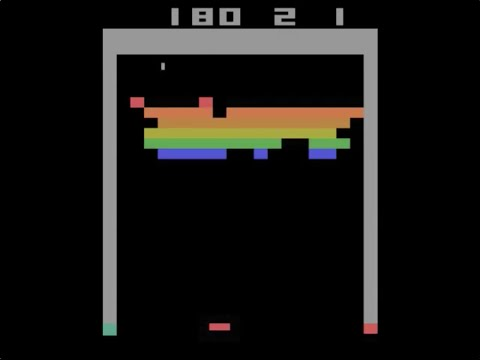

In [1]:
#@title DQN Going Superhuman
#@markdown In this now classic video, watch & see how the DQN algorithm learns the absolute best way to play the Atari game of Breakout.
from IPython.display import YouTubeVideo 
YouTubeVideo('TmPfTpjtdgg', width=600, height=400)

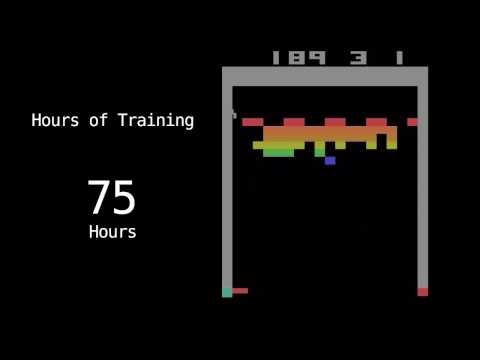

In [2]:
#@title DQN Training...
#@markdown Here we can see a DQN Agent training
from IPython.display import YouTubeVideo 
YouTubeVideo('eG1Ed8PTJ18', width=600, height=400)

One thing you might have noticed in the video above is "hours training". Unfortunately back in 2015, DQN took 75 hours to train a DQN up to human level.

**That is 3.125 days worth of compute time!**

Things have changed since 2015 however & lucky for us the introduction of DQN kicked off a wave of resurgence in academic study focussing on Reinforcement Learning, [leading to many new algorithms](https://arxiv.org/pdf/1708.07902.pdf), some of which we can see in the image below! 

Notice how DQN is the middle!



![alt text](https://i.ibb.co/sy9xRF2/Screen-Shot-2019-02-21-at-9-30-09-am.png)


.

In todays lab we are going to making use of an algorithm developed by Deepmind called "IMPALA" which is short hand for[ "Importance Weighted Actor-Learner Architectures"](https://arxiv.org/abs/1802.01561). IMPALA is a distant couzin of DQN and is state of the art being [actively used by Deepmind right now for their research. ](https://www.quora.com/Is-Deepmind-AIs-alphastar-a-model-free-or-model-based-RL-model)

Unlike DQN, IMPALA allows us to parallelize training of our Reinforcement Learning agents and supports and makes use of both CPUs & GPUs.

## We are going to show you how, using AWS, you can parallelize the training of your reinforcment learning algorithms to get insanely fast turn around times & results for your reinforcement learning experiments.

The objective of today's lab is going to be:



1.   Make use of a state of the art Reinforcement Learning algorithm (IMPALA) to learn how to play the Atari game of breakout!
2.   Make use of Amazon's state of the art compute resources. Instead of 3.125 days of training time, we are going to train our RL Agent to play Atari Breakout in 15 minutes.



In [0]:
!pip install ray[rllib]
!pip install ray[debug]


In [0]:
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.impala as impala
from ray.tune.logger import pretty_print

In [0]:
ray.init()

In [0]:
!cat /proc/cpuinfo | grep processor | wc -l

In [0]:
config = impala.DEFAULT_CONFIG.copy()
config["num_gpus"] = 1
config["num_workers"] = 2
agent = impala.ImpalaAgent(config=config, env="BreakoutNoFrameskip-v4") 

#IMPALA

#CartPole-v0

#BreakoutNoFrameskip-v4
#BreakoutDeterministic-v4

#SpaceInvadersNoFrameskip-v4

# Can optionally call agent.restore(path) to load a checkpoint.

for i in range(10000):
   # Perform one iteration of training the policy with PPO
   result = agent.train()
   print(pretty_print(result))

   if i % 100 == 0:
       checkpoint = agent.save()
       print("checkpoint saved at", checkpoint)

In [0]:
!ls

In [0]:
!ls /root/ray_results/

In [0]:
!sudo apt-get install zip

In [0]:
!zip -r rayresults.zip /root/ray_results/IMPALA_BreakoutNoFrameskip-v4_2019-03-23_03-35-07yjaccs4e/

In [0]:
!ls

In [0]:
from google.colab import files

files.download('./rayresults.zip')